In [1]:
#IMPORTING THE NECCESSRY PACKAGES NEEDED

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### A. Dataset Exploration

In [2]:
#LOADING OUR DATA FILE IN CSV FORMAT
df = pd.read_csv(r"Loan_default.csv")


In [3]:
#CHECKING THE COLUMNS OF OUR DATA
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#CHECKING THE SHAPE OF OUR DATA
df.shape

(255347, 18)

In [5]:
#Checking for null values
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
#Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
#Checking the statistics of the nueric data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [8]:
df.describe(include='object').transpose()

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


### B.  VISUALIZATION

<ipython-input-9-c58212543924>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=df, palette='Set1')


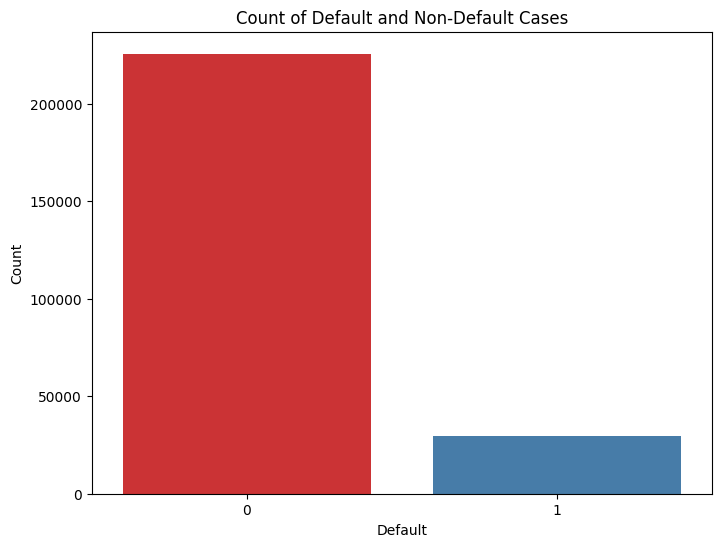

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df, palette='Set1')
plt.title('Count of Default and Non-Default Cases')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

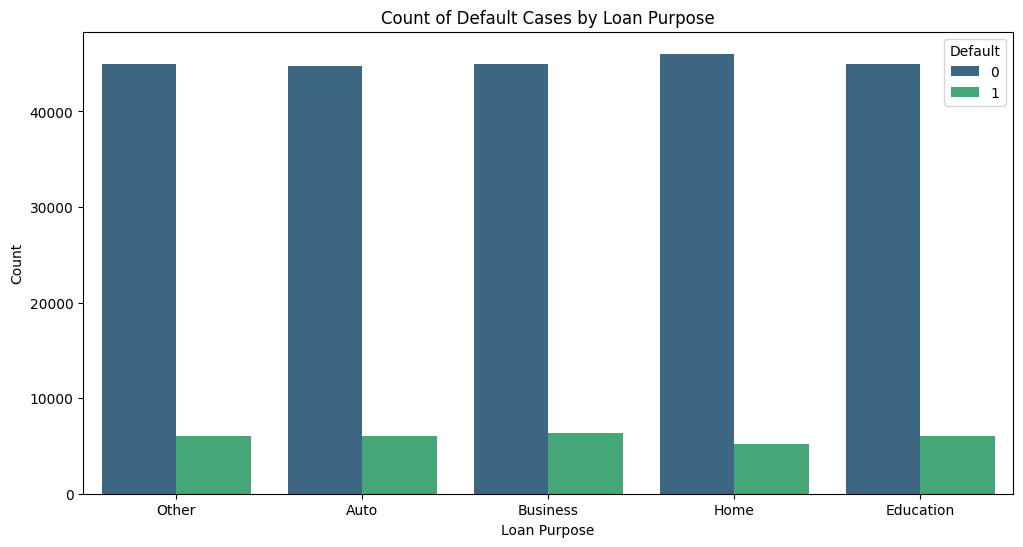

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='LoanPurpose', hue='Default', data=df, palette='viridis')
plt.title('Count of Default Cases by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()



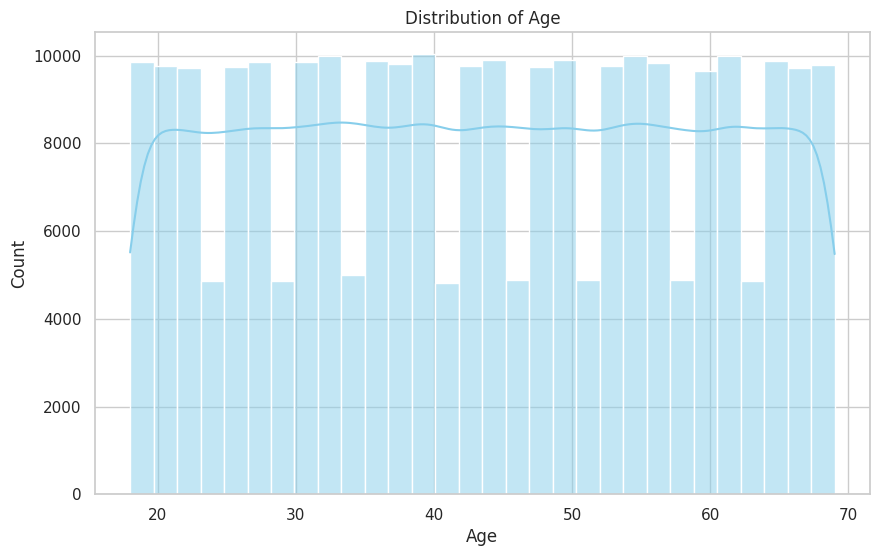

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()



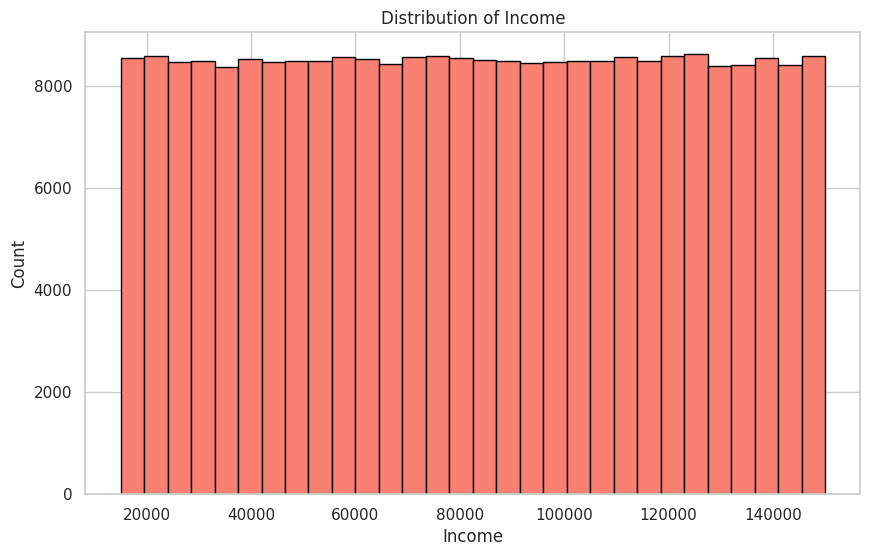

In [12]:
# Create a bar chart for the distribution of Income
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins= 30, color='salmon', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

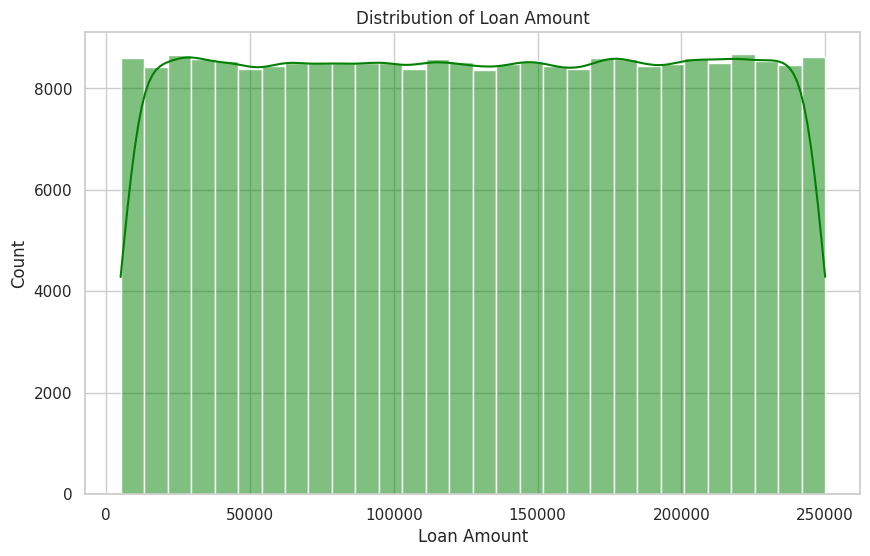

In [13]:
# Visualizing Loan Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='green')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


<ipython-input-14-a0a6fa75abb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EmploymentType', data=df, palette='pastel')


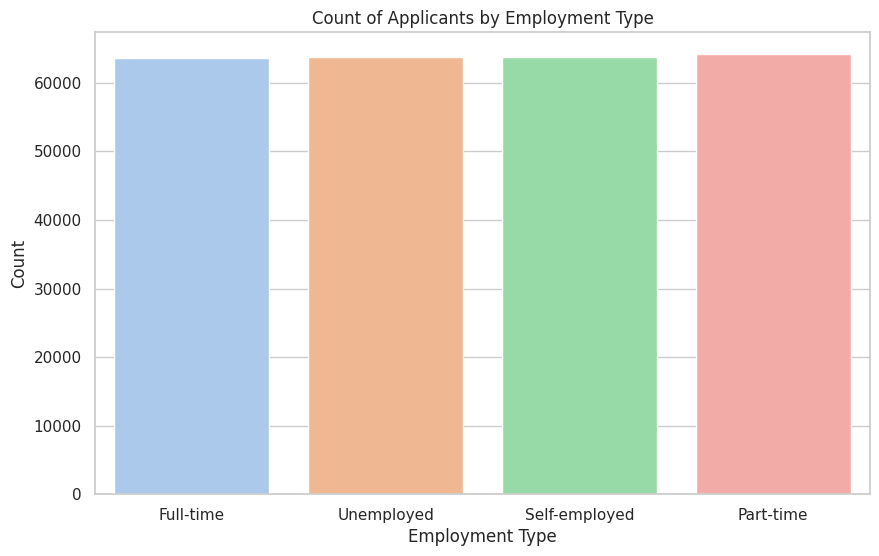

In [14]:
# Countplot for Employment Type
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentType', data=df, palette='pastel')
plt.title('Count of Applicants by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

<ipython-input-15-0474727d3bba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='Age', data=df, palette='coolwarm')


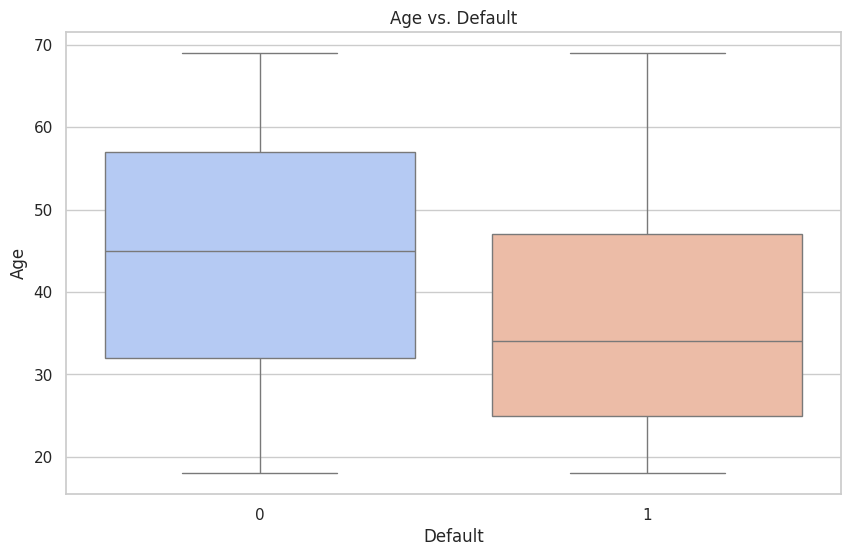

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Age', data=df, palette='coolwarm')
plt.title('Age vs. Default')
plt.xlabel('Default')
plt.ylabel('Age')
plt.show()

<ipython-input-16-f6ca6d6270f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y='Income', data=df, palette='viridis')


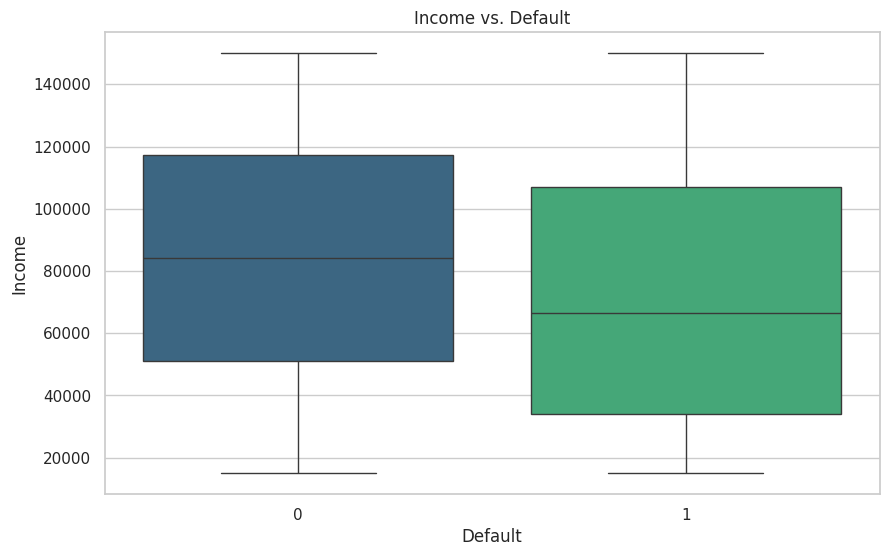

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Income', data=df, palette='viridis')
plt.title('Income vs. Default')
plt.xlabel('Default')
plt.ylabel('Income')
plt.show()


In [17]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

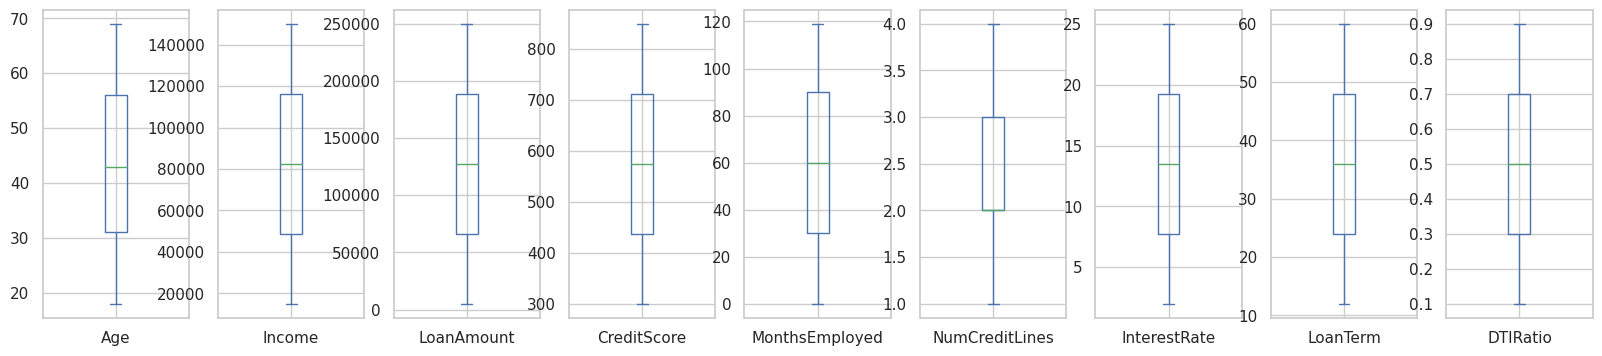

In [18]:
#Checking for outliers

var=['Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
df[var].plot(
kind = 'box',
figsize = (20,4),
subplots = True);

In [19]:
#Removig the ID column

df= df.drop('LoanID', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

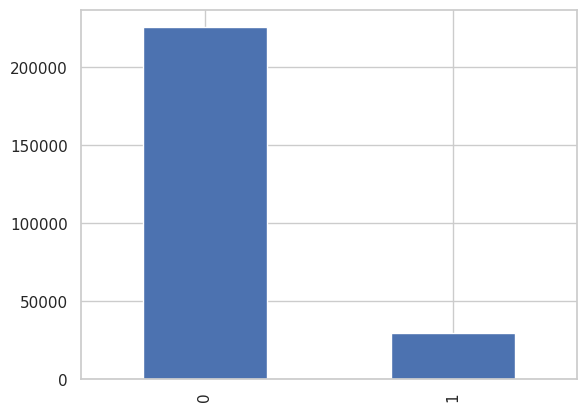

In [21]:
df['Default'].value_counts().plot(kind='bar');

In [22]:
#Add Age group for our ages
def ageconversion(age):
    agecategory=[]
    for i in age:
        if i <20:
            agecategory.append('<20')
        elif i <26:
            agecategory.append('20-25')
        elif i < 31:
            agecategory.append('26-30')
        elif i < 36:
            agecategory.append('31-35')
        elif i < 41:
            agecategory.append('36-40')
        elif i < 46:
            agecategory.append('41-45')
        elif i <51:
            agecategory.append('46-50')
        elif i <56:
            agecategory.append('51-55')
        elif i <61:
            agecategory.append('56-60')
        else:
            agecategory.append('>60')



    return agecategory


In [23]:
df['age_category']=ageconversion(df['Age'])

In [24]:
#Categorising the Credit score

def creditscoreconversion(creditscore):
    creditscorecategory=[]
    for i in creditscore:
        if i <300:
            creditscorecategory.append('<300')
        elif i <401:
            creditscorecategory.append('300-400')
        elif i < 501:
            creditscorecategory.append('401-500')
        elif i < 601:
            creditscorecategory.append('501-600')
        elif i < 701:
            creditscorecategory.append('601-700')
        elif i < 801:
            creditscorecategory.append('701-800')
        else:
            creditscorecategory.append('> 800')



    return creditscorecategory


In [25]:
df['creditscore_category']=creditscoreconversion(df['CreditScore'])

In [26]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_category,creditscore_category
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,56-60,501-600
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,>60,401-500
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,46-50,401-500
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,31-35,701-800
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,56-60,601-700


In [27]:
#Lets look at the unique values of the categorical fields in the dataframe.

for col in df:
  if df[col].dtype == "object":
    print(f"{col}: {df[col].unique()}")

Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']
age_category: ['56-60' '>60' '46-50' '31-35' '20-25' '36-40' '26-30' '41-45' '51-55'
 '<20']
creditscore_category: ['501-600' '401-500' '701-800' '601-700' '> 800' '300-400']


In [28]:
# this scripts looks at all our categorical fields that contain either yes or no and replaces their value with 1 and 0 respectively

for column in df:
    if df[column].dtype == 'object' and set(df[column].unique()) == {'Yes', 'No'}:
        df[column] = df[column].map({'Yes': 1, 'No': 0})

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Education']      = le.fit_transform(df['Education'])
df['EmploymentType'] = le.fit_transform(df['EmploymentType'])
df['MaritalStatus']  = le.fit_transform(df['MaritalStatus'])
df['LoanPurpose']    = le.fit_transform(df['LoanPurpose'])


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = ['InterestRate', 'DTIRatio','Age','Income','LoanAmount','LoanTerm','CreditScore','MonthsEmployed','NumCreditLines']
df[col] = scaler.fit_transform(df[col])

In [31]:
df = df.dropna()
x = df.drop(['age_category','creditscore_category','Default'], axis = 1)
y = df.Default
pd.set_option('display.max_columns', None)        #This will ensure that all the data attributes are displayed

df.isnull().sum()

Age                     0
Income                  0
LoanAmount              0
CreditScore             0
MonthsEmployed          0
NumCreditLines          0
InterestRate            0
LoanTerm                0
DTIRatio                0
Education               0
EmploymentType          0
MaritalStatus           0
HasMortgage             0
HasDependents           0
LoanPurpose             0
HasCoSigner             0
Default                 0
age_category            0
creditscore_category    0
dtype: int64

<Axes: >

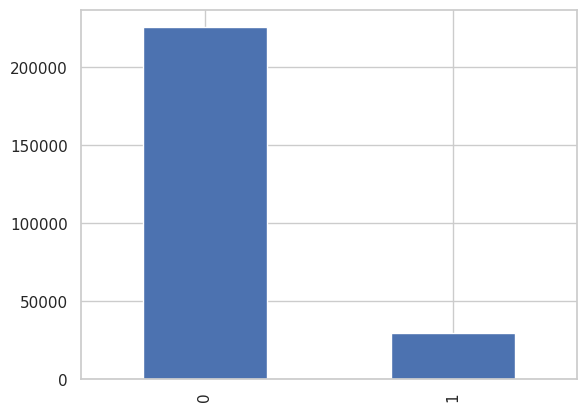

In [32]:
y.value_counts().plot(kind='bar')

In [33]:
#BALANCING OUR INBALANCE DATA using SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)


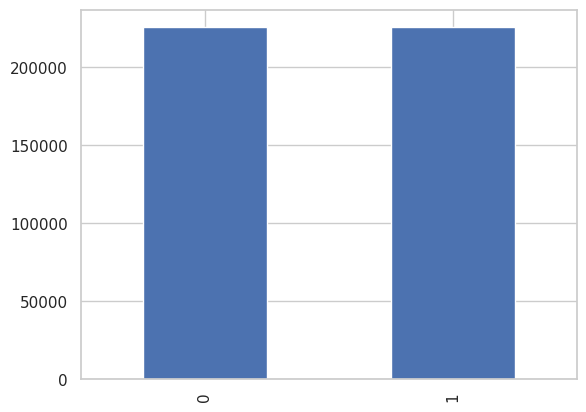

In [34]:
#Confirmingg our balanced data
y_resampled.value_counts().plot(kind='bar');


In [35]:
#splitting our data training data and testing data

x_train,x_test,y_train,y_test= train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [36]:
print(x_train.shape)
print(x_resampled.shape)

(361110, 16)
(451388, 16)


In [37]:
#Using Logistic Regression for our model
#model=RandomForestClassifier()

log_model = LogisticRegression(C = 10, solver = 'liblinear')
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)
accuracy =accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

In [38]:
print(f'The accuracy is {accuracy:.3f}')
print(f'The precision is {precision:.3f}')
print(f'The recall is {recall:.3f}')
print(f'The f1 is {f1:.3f}')

The accuracy is 0.700
The precision is 0.694
The recall is 0.717
The f1 is 0.705


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70     45127
           1       0.69      0.72      0.71     45151

    accuracy                           0.70     90278
   macro avg       0.70      0.70      0.70     90278
weighted avg       0.70      0.70      0.70     90278



In [40]:
!pip install xgboost
import xgboost

In [41]:
xg_model = xgboost.XGBClassifier(objective="binary:logistic", random_state=42)

xg_model.fit(x_train, y_train)

y_predict = xg_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     45127
           1       0.98      0.85      0.91     45151

    accuracy                           0.92     90278
   macro avg       0.93      0.92      0.92     90278
weighted avg       0.93      0.92      0.92     90278



#### LOADING THE MODEL

In [42]:
import joblib

In [43]:
joblib.dump(xg_model, 'xg_modelled.joblib')

['xg_modelled.joblib']

In [44]:
loaded_model = joblib.load(r"xg_modelled.joblib")

In [45]:
loaded_model.predict(x_test)

array([1, 1, 1, ..., 1, 0, 1])